# Boston Housing Price Predicting

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from scipy import stats
# special matplotlib argument for improved plots
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set_style("whitegrid")
sns.set_context("poster")

## Load dataset

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()

In [29]:
# Check keys of boston
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [38]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Check shape of dataset
print(boston.data.shape)

(506, 13)


In [6]:
# Check features
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# Convert data to pandas format
bos = pd.DataFrame(boston.data)
# Add name of columns
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Preprocessing

In [42]:
# Check missing value
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### ->  there are no missing values in this dataset as shown below.

## Exploratory Data Analysis

c:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


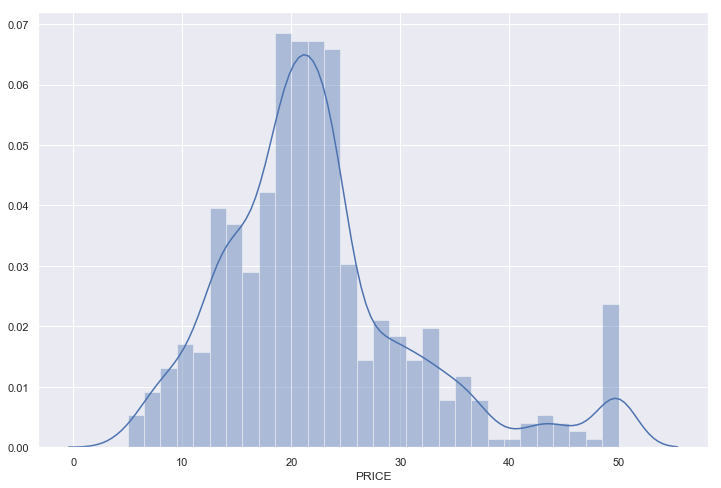

In [44]:
# Visuallizations to understand the relationship of the target variable with other features
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(bos['PRICE'],bins=30)
plt.show()

#### -> The values of PRICE are distributed normally with few outlier

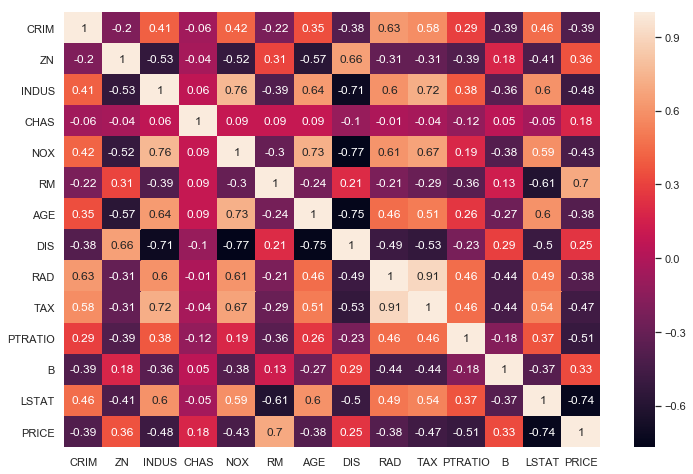

In [46]:
# Create a correlation matrix that measures the linear relationships between the variables
correlation_matrix = bos.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

### Observations:
+ RM has a strong positive correlation with PRICE (0.7), LSTAT with PRICE (0.74)
+ RAD, TAX have a correlation of 0.91 -> strongly corrected to each other
+ DIS and AGE have a correlation of -0.75

In [53]:
#sns.pairplot(bos[['AGE','DIS','RAD','TAX']])

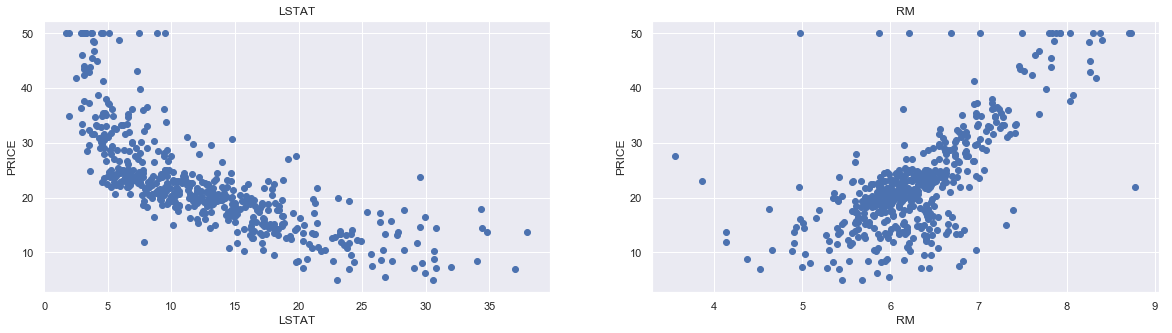

In [60]:
# Visuallization to see how these features vary with PRICE
plt.figure(figsize=(20,5))
features = ['LSTAT','RM']
target = bos['PRICE']
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = bos[col]
    y = target
    plt.scatter(x,y,marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

## Observations:
+ The prices increase as the values of RM increases linearly. There are few outlier and the data seems to be capped at 50.
+ The prices tend to decrease with an increase with an increase in LSTAT. Though it doesn't look to be following exactly a linear line

## Preparing the data for training the model

In [63]:
X = pd.DataFrame(np.c_[bos['LSTAT'],bos['RM']], columns = ['LSTAT','RM'])
Y = bos['PRICE']

In [64]:
X.head()

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


## Splitting the data into training and testing sets

In [9]:
# Split the training and test data set in 80%:20%
#X : All other features
#Y : Boston Housing Price
X = bos.drop('PRICE',axis =1)
Y = bos['PRICE']

In [65]:
# Dataset for training and testing
# Assign random_state to any value. This ensure consistency
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


## Train the model using sklearn LinearRegression

In [67]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model evaluation

In [70]:
# Model evaluaion for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train,y_train_predict)

In [71]:
print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701




In [74]:
# Model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

In [75]:
print('The model performance for training set')
print('--------------------------------------')
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('\n')

The model performance for training set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953




Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

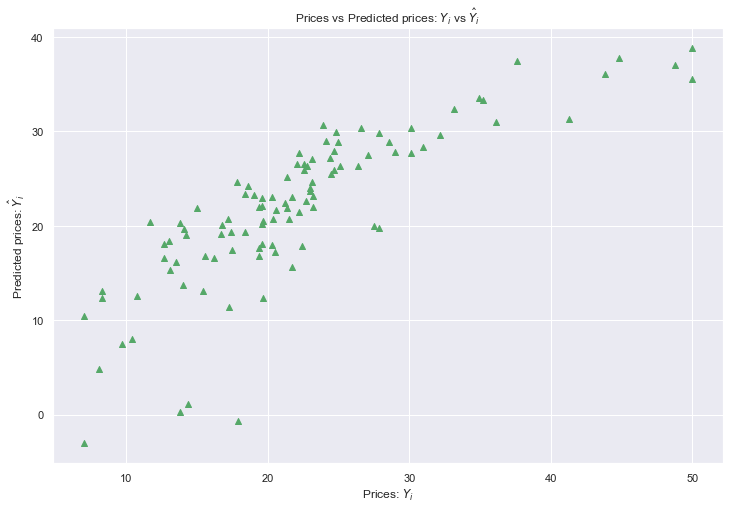

In [81]:
# Ploting the y_test vs y_test_predict
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict,marker='^', c='g' )
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")